In [100]:
using Plots
using Plots.PlotMeasures
using JLD2
using StatsBase
using DelimitedFiles
using StatsPlots

# IPD

In [12]:
# load HiveCote2 (copy-paste dump from aeon)
hc2 = [0.96987366, 0.96987366, 0.9494655 , 0.96793003, 0.96015549,
    0.96793003, 0.96793003, 0.95626822, 0.96695821, 0.96695821,
    0.96793003, 0.96695821, 0.95724004, 0.94557823, 0.96987366,
    0.96598639, 0.96501458, 0.96015549, 0.9718173 , 0.96793003,
    0.96598639, 0.95626822, 0.96112731, 0.96695821, 0.96209913,
    0.95918367, 0.96209913, 0.95918367, 0.95043732, 0.96598639]
hc2_mean_ipd = mean(hc2)
hc2_std = std(hc2)
hc2_standard_error_ipd = hc2_std / sqrt(length(hc2));

In [11]:
# load InceptionTime
icpt = [0.96598639, 0.94752187, 0.96209913, 0.96890185, 0.96695821,
    0.96695821, 0.96695821, 0.96307094, 0.92419825, 0.96695821,
    0.95724004, 0.95626822, 0.96015549, 0.96695821, 0.9718173 ,
    0.96695821, 0.92517007, 0.95918367, 0.96987366, 0.97278912,
    0.97084548, 0.96501458, 0.92419825, 0.96793003, 0.96987366,
    0.96112731, 0.96890185, 0.9494655 , 0.96015549, 0.96695821]
icpt_mean_ipd = mean(icpt)
icpt_std = std(icpt)
icpt_standard_error_ipd = icpt_std / sqrt(length(icpt));

In [10]:
# load 1-NN DTW
dtw = [0.95043732, 0.88532556, 0.92808552, 0.90962099, 0.93294461,
    0.93294461, 0.9154519 , 0.94266278, 0.91448008, 0.92808552,
    0.9154519 , 0.93197279, 0.92225462, 0.93974733, 0.89018465,
    0.91448008, 0.9047619 , 0.92031098, 0.93586006, 0.91739553,
    0.93780369, 0.91448008, 0.90573372, 0.93586006, 0.93488824,
    0.93488824, 0.92614189, 0.90184645, 0.91448008, 0.93197279]
dtw_mean_ipd = mean(dtw)
dtw_std = std(dtw)
dtw_standard_error_ipd = dtw_std / sqrt(length(dtw))

0.0028074643445294995

In [6]:
f = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ItalyPower/ItalyPowerBench_eta001:10_d2:10_chi5:30.jld2", "r");
per_fold_accs = read(f, "per_fold_accs");
per_fold_best_model = read(f, "per_fold_best_model");

In [9]:
mps_mean_acc_ipd = mean(per_fold_accs);
println("Mean Acc: $mean_acc")
median_acc = median(per_fold_accs);
println("Median Acc: $median_acc")
range_acc = maximum(per_fold_accs) - minimum(per_fold_accs)
println("Range Acc: $range_acc")
std_acc = std(per_fold_accs)
println("Std Acc: $std_acc")
mps_standard_err_acc_ipd = std_acc / sqrt(length(per_fold_accs));
println("Standard Error Acc: $standard_err_acc")

Mean Acc: 0.953871072238419
Median Acc: 0.9572400388726919
Range Acc: 0.048590864917395504
Std Acc: 0.011810908964858069
Standard Error Acc: 0.0021563670882309184


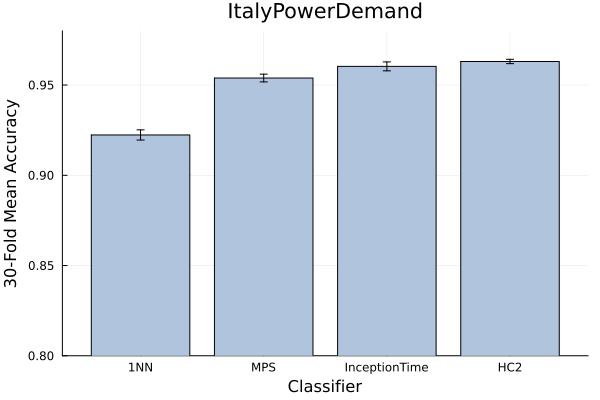

In [14]:
xs = ["1NN", "MPS", "InceptionTime", "HC2"]
ys = [dtw_mean_ipd, mps_mean_acc_ipd, icpt_mean_ipd, hc2_mean_ipd]
ses = [dtw_standard_error_ipd, mps_standard_err_acc_ipd, icpt_standard_error_ipd, hc2_standard_error_ipd]
order = sortperm(ys)

xs = xs[order]
ys = ys[order]
ses = ses[order]

p = bar(xs, ys, title="ItalyPowerDemand", c=:lightsteelblue, legend=:none, ylim=(0.8, 0.98), xlabel="Classifier",
    ylabel="30-Fold Mean Accuracy", yerr=ses)

In [15]:
f = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ECG200/ECG200Bench_eta001:10_d2:6_chi15:40.jld2", "r");
per_fold_accs_r1 = read(f, "per_fold_accs");
per_fold_best_model_r1 = read(f, "per_fold_best_model");

In [16]:
mps_mean_acc_ecg = mean(per_fold_accs_r1);
# println("Mean Acc: $mean_acc_r1")
median_acc_r1 = median(per_fold_accs_r1);
# println("Median Acc: $median_acc_r1")
range_acc_r1 = maximum(per_fold_accs_r1) - minimum(per_fold_accs_r1)
# println("Range Acc: $range_acc_r1")
std_acc_r1 = std(per_fold_accs_r1)
# println("Std Acc: $std_acc_r1")
mps_standard_err_acc_ecg = std_acc_r1 / sqrt(length(per_fold_accs_r1));
# println("Standard Error Acc: $standard_err_acc_r1")

0.00552805453782613

In [17]:
hc2 = [0.86, 0.87, 0.87, 0.94, 0.91, 0.91, 0.9 , 0.93, 0.91, 0.88, 0.9 ,
    0.89, 0.91, 0.87, 0.93, 0.95, 0.89, 0.96, 0.88, 0.89, 0.87, 0.87,
    0.88, 0.87, 0.9 , 0.86, 0.85, 0.9 , 0.93, 0.91]
hc2_mean_ecg = mean(hc2)
hc2_median = median(hc2)
hc2_range = maximum(hc2) - minimum(hc2)
hc2_std = std(hc2)
hc2_standard_error_ecg = hc2_std / sqrt(length(hc2));

In [18]:
icpt = [0.91, 0.91, 0.92, 0.9 , 0.91, 0.92, 0.91, 0.92, 0.93, 0.91, 0.87,
    0.87, 0.85, 0.89, 0.92, 0.9 , 0.83, 0.88, 0.92, 0.89, 0.88, 0.87,
    0.89, 0.92, 0.89, 0.9 , 0.85, 0.92, 0.88, 0.94]
icpt_mean_ecg = mean(icpt)
icpt_median = median(icpt)
icpt_range = maximum(icpt) - minimum(icpt)
icpt_std = std(icpt)
icpt_standard_error_ecg = icpt_std / sqrt(length(icpt));

In [19]:
dtw = [0.77, 0.79, 0.79, 0.77, 0.81, 0.84, 0.75, 0.85, 0.77, 0.84, 0.8 ,
    0.7 , 0.84, 0.77, 0.8 , 0.8 , 0.84, 0.78, 0.79, 0.75, 0.81, 0.76,
    0.75, 0.8 , 0.82, 0.8 , 0.78, 0.8 , 0.78, 0.83]
dtw_mean_ecg = mean(dtw)
dtw_median = median(dtw)
dtw_range = maximum(dtw) - minimum(dtw)
dtw_std = std(dtw)
dtw_standard_error_ecg = dtw_std / sqrt(length(dtw))

0.006157573289231767

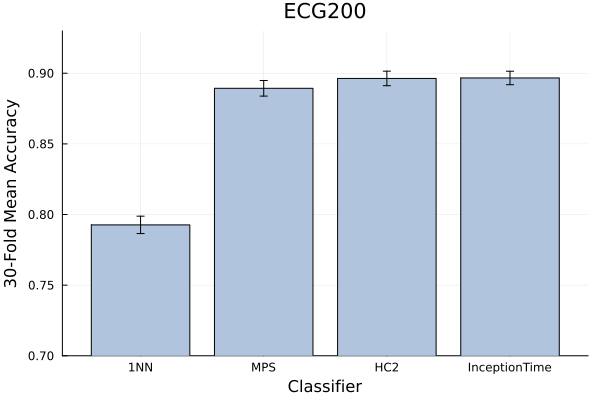

In [21]:
xs = ["1NN", "MPS", "InceptionTime", "HC2"]
ys = [dtw_mean_ecg, mps_mean_acc_ecg, icpt_mean_ecg, hc2_mean_ecg]
ses = [dtw_standard_error_ecg, mps_standard_err_acc_ecg, icpt_standard_error_ecg, hc2_standard_error_ecg]
order = sortperm(ys)
xs = xs[order]
ys = ys[order]
ses = ses[order]

p = bar(xs, ys, title="ECG200", c=:lightsteelblue, legend=:none, ylim=(0.7, 0.93), xlabel="Classifier",
    ylabel="30-Fold Mean Accuracy", yerr=ses)

In [98]:
f_kep = jldopen("NASA_KeplerV2/classification/Julia/KeplerBench30_mps_results_opt.jld2", "r");
mps_accs_kep = read(f_kep, "accs");
mps_mean_acc_kep = mean(mps_accs_kep);
mps_std_acc_kep = std(mps_accs_kep);
mps_standard_err_kep = std(mps_accs_kep)/sqrt(30)

0.006677170721616358

In [92]:
pwd()

"/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks"

In [111]:
f_dtw_kep = readdlm("NASA_KeplerV2/classification/Python/nn_dtw_kepler_30fold_results.txt");
dtw_accs_kep = [f_dtw_kep...]
dtw_mean_kep = mean(dtw_accs_kep);
dtw_std_kep = std(dtw_accs_kep);
dtw_standard_error_kep = dtw_std_kep/sqrt(30)

0.005536338091064671

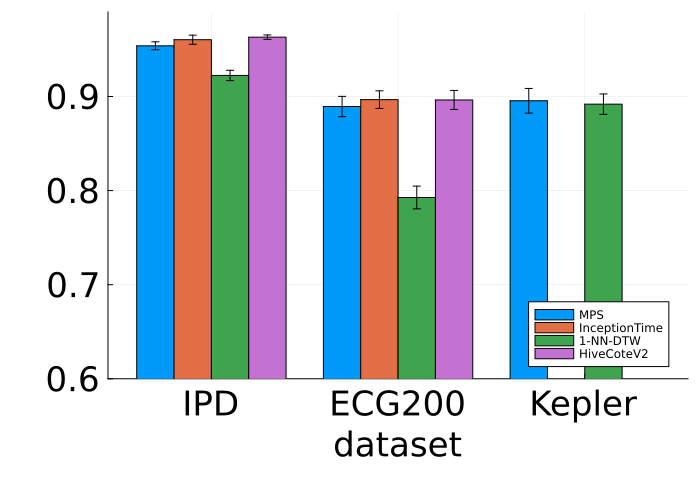

In [115]:
fstyle = font("sans-serif", 23)
mps = [mps_mean_acc_ipd, mps_mean_acc_ecg, mps_mean_acc_kep]
mps_errs = [1.96*mps_standard_err_acc_ipd, 1.96*mps_standard_err_acc_ecg, 1.96*mps_standard_err_kep]
ict = [icpt_mean_ipd, icpt_mean_ecg, 0.1]
ict_errs = [1.96*icpt_standard_error_ipd, 1.96*icpt_standard_error_ecg, 0.1]
nn = [dtw_mean_ipd, dtw_mean_ecg, dtw_mean_kep]
nn_ers = [1.96*dtw_standard_error_ipd, 1.96*dtw_standard_error_ecg, 1.96*dtw_standard_error_kep]
hc2 = [hc2_mean_ipd, hc2_mean_ecg, 0.1]
hc2_errs = [1.96*hc2_standard_error_ipd, 1.96*hc2_standard_error_ecg, 0.1]
groupedbar([mps ict nn hc2], yerr=[mps_errs ict_errs nn_ers hc2_errs],
    xticks=(1:3, ["IPD", "ECG200", "Kepler"]), xlabel="dataset",
    label=["MPS" "InceptionTime" "1-NN-DTW" "HiveCoteV2"], ylim=(0.6, 0.99),
    xtickfont=fstyle, ytickfont=fstyle, guidefont=fstyle, size=(700, 500),
    left_margin=10mm, bottom_margin=12mm, top_magin=10mm)
#savefig("final_classification_accuracies.svg")